In [38]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import re


In [39]:
import nfx

In [40]:
import neattext.functions as nfx

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [42]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
from nltk.corpus import stopwords

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report

In [44]:
import joblib

In [45]:
df=pd.read_csv('emotion_dataset_2.csv')

In [46]:
df

,Unnamed: 0,Emotion,Text,Clean_Text
0,0,neutral,Why ?,NaN
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...
...,...,...,...,...
34787,34787,surprise,@MichelGW have you gift! Hope you like it! It'...,gift Hope like it hand wear Itll warm Lol
34788,34788,joy,The world didnt give it to me..so the world MO...,world didnt meso world DEFINITELY cnt away
34789,34789,anger,A man robbed me today .,man robbed today
34790,34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO...",Youu JEALOUSY #Losing YOU


In [47]:
df.columns

Index(['Unnamed: 0', 'Emotion', 'Text', 'Clean_Text'], dtype='object')

In [48]:
df.drop(columns=['Unnamed: 0','Clean_Text'],inplace=True)

In [49]:
df

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...
...,...,...
34787,surprise,@MichelGW have you gift! Hope you like it! It'...
34788,joy,The world didnt give it to me..so the world MO...
34789,anger,A man robbed me today .
34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO..."


In [50]:
#value counts
df['Emotion'].value_counts()

Emotion
joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: count, dtype: int64

<Axes: ylabel='Emotion'>

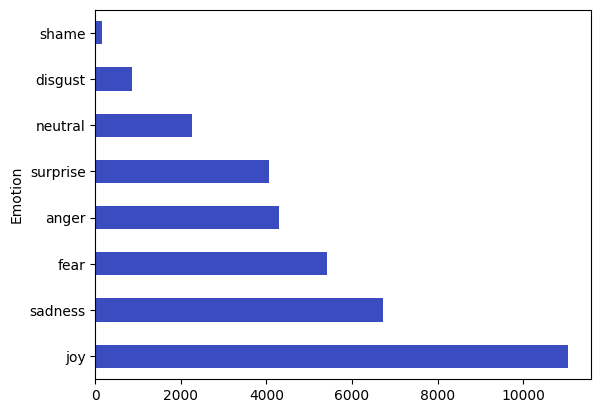

In [51]:
#value counts
df['Emotion'].value_counts().plot(kind='barh',colormap='coolwarm')

Data Cleaning

In [52]:
df['Text']

0                                                   Why ? 
1          Sage Act upgrade on my to do list for tommorow.
2        ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3         Such an eye ! The true hazel eye-and so brill...
4        @Iluvmiasantos ugh babe.. hugggzzz for u .!  b...
                               ...                        
34787    @MichelGW have you gift! Hope you like it! It'...
34788    The world didnt give it to me..so the world MO...
34789                             A man robbed me today . 
34790    Youu call it JEALOUSY, I call it of #Losing YO...
34791    I think about you baby, and I dream about you ...
Name: Text, Length: 34792, dtype: object

User handles 

In [53]:
def user_handles(text):
    # Remove user handles (e.g., @username)
    text = re.sub(r'@\w+', '', text)
    # Remove all non-alphabetical words (including numbers and special characters)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [54]:
df['Clean_Text']=df['Text'].apply(user_handles)

In [55]:
df

,Emotion,Text,Clean_Text
0,neutral,Why ?,Why
1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade on my to do list for tommorow
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,ON THE WAY TO MY HOMEGIRL BABY FUNERAL MAN I H...
3,joy,Such an eye ! The true hazel eye-and so brill...,Such an eye The true hazel eyeand so brilliant...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz for u babe naamazed nga ako ...
...,...,...,...
34787,surprise,@MichelGW have you gift! Hope you like it! It'...,have you gift Hope you like it Its hand made a...
34788,joy,The world didnt give it to me..so the world MO...,The world didnt give it to meso the world MOST...
34789,anger,A man robbed me today .,A man robbed me today
34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO...",Youu call it JEALOUSY I call it of Losing YOU


Stop Words

In [56]:
# Create a set of stop words 
stop_words = set(stopwords.words('english')) 


In [57]:
# Define a function to remove stop words from a sentence 
def remove_stop_words(sentence): 
  # Split the sentence into individual words 
  words = sentence.split() 
  
  # Use a list comprehension to remove stop words 
  filtered_words = [word for word in words if word not in stop_words] 
  
  # Join the filtered words back into a sentence 
  return ' '.join(filtered_words)

In [58]:
df['Clean_Text']=df['Clean_Text'].apply(remove_stop_words)

In [59]:
df

,Emotion,Text,Clean_Text
0,neutral,Why ?,Why
1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,ON THE WAY TO MY HOMEGIRL BABY FUNERAL MAN I H...
3,joy,Such an eye ! The true hazel eye-and so brill...,Such eye The true hazel eyeand brilliant Regul...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e ba...
...,...,...,...
34787,surprise,@MichelGW have you gift! Hope you like it! It'...,gift Hope like Its hand made wear Itll keep wa...
34788,joy,The world didnt give it to me..so the world MO...,The world didnt give meso world MOST DEFINITEL...
34789,anger,A man robbed me today .,A man robbed today
34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO...",Youu call JEALOUSY I call Losing YOU


FEATURE ENGINEERING

In [60]:
Xfeatures=df['Clean_Text']

In [61]:
ylabels=df['Emotion']

Splitting data before vectorizing it

In [62]:
X_train,X_test,Y_train,Y_test=train_test_split(Xfeatures,ylabels,test_size=0.3,random_state=42)

Model building

In [63]:
#logisitic regression pipeline 
pipe_lr=Pipeline(steps=[('cv', CountVectorizer()),('lr',LogisticRegression())])

In [64]:
#training
pipe_lr.fit(X_train,Y_train)

c:\Users\Dell\anaconda3\envs\streamlitenv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [65]:
#accuracy
pipe_lr.score(X_test,Y_test)

0.6302931596091205

In [66]:
#prediction
ex1="This book was so interesting that it made me happy"

In [67]:
pipe_lr.predict([ex1])

array(['joy'], dtype=object)

In [68]:
ex2="Why you dont do your work correctly"

In [69]:
pipe_lr.predict([ex2])

array(['anger'], dtype=object)

In [70]:
pipe_lr.predict_proba([ex2])

array([[4.76201005e-01, 4.09207787e-03, 2.03325710e-02, 3.26286160e-02,
        4.47134200e-01, 1.39677316e-02, 3.84740306e-04, 5.25905866e-03]])

In [71]:
pipeline_file=open("emotion_classifier_pipe_lr_16_dec_2024.pkl","wb")
joblib.dump(pipe_lr,pipeline_file)
pipeline_file.close()